In [43]:
"""
    This guide trains a neural network model to classify images of clothing.

    Uses tf.keras   ->      a high-level API to build and train models in TF.

    https://www.tensorflow.org/tutorials/keras/classification
"""
from __future__ import absolute_import, division, print_function, unicode_literals

#   TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras

#   Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [6]:
'''
    Import the Fashion MNIST dataset
                                    -> 70,000 grayscale images in 10 categories
                                    -> 28 x 28 pixels

    intended as a replacement for the classic MNIST dataset

    60,000 images   ->  train the network
    10,000 images   ->  eval accuracy
'''

#   Import & Load dataset directly from TensorFlow
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


'''
    load_data() returns ->  Tuple of 4 NumPy arrays
                                (x_train, y_train), (x_test,y_test)
                            ie
                                (train_images, train_labels), (test_images, test_labels) 
                            https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

    
    Each image is mapped to a single label.
    Since the class names are not included with the dataset,
    store them here to use later when plotting the image:

'''
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
'''
#   Explore the data
'''
#   Returns shape of the array in a tuple, ie (60,000, 28, 28)
print(train_images.shape)
'''
train_images as well as the other 3 items returned from load_data() during the previous step
are in fact of type

    numpy.ndarray


So they comply to:  https://numpy.org/devdocs/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape
                    https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

->  Nice Link:      https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/

    "The shape (= size of each dimension) of numpy.ndarray can be obtained as a tuple with attribute shape.

        Even in the case of a one-dimensional array, it is a tuple with one element instead of an integer value.
        Note that a tuple with one element has a trailing comma."


At first i got confused by tf.shape     https://www.tensorflow.org/api_docs/python/tf/shape
and went to
                                        https://www.tensorflow.org/api_docs/python/tf/Tensor#consumers
            which states that tensor.consumers() returns a list of Operations that consume this tensor.

            attempting to return the consumers list resulted in the following error:
                ---------------------------------------------------------------------------
                AttributeError                            Traceback (most recent call last)
                in 
                    32 
                    33 #type(train_images)
                ---> 34 train_images.consumers()

                AttributeError: 'numpy.ndarray' object has no attribute 'consumers'
                ---------------------------------------------------------------------------



However, a more solid approach to test object types, is to use

    type(object)    ->  Which here returns numpy.ndarray


    could just do       type(train_images)              =>      numpy.ndarray
    or even             print(type(train_images))       =>      <class 'numpy.ndarray'>
'''

#   Number of Training Images   ie  60000
print(len(train_images))
#   Number of Training Labels   ie  60000
print(len(train_labels))

#   Show numpy.ndarray structure    ie      array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)
train_labels

#   Returns shape of the array in a tuple, ie (10000, 28, 28)
print(test_images.shape)

#   Number of Testing Images    ie  10000
print(len(test_images))

#   Number of Testing Labels    ie  10000
print(len(test_labels))

(60000, 28, 28)
60000
60000
(10000, 28, 28)
10000
10000


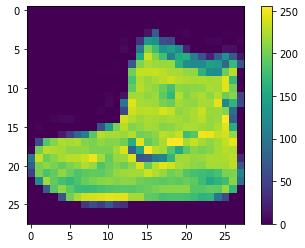

In [46]:
'''
#   Preprocess the Data
'''
#   Inspecting the first image in the training set.
#   Pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [48]:
#   We are going to scale images of both training as well as testing sets down to a scale in the range of 0 to 1
#   Pixels are values between   ->  0 and 255
#   We are effectively scaling down to  ->  0 and 255
train_images = train_images / 255.0
test_images = test_images / 255.0

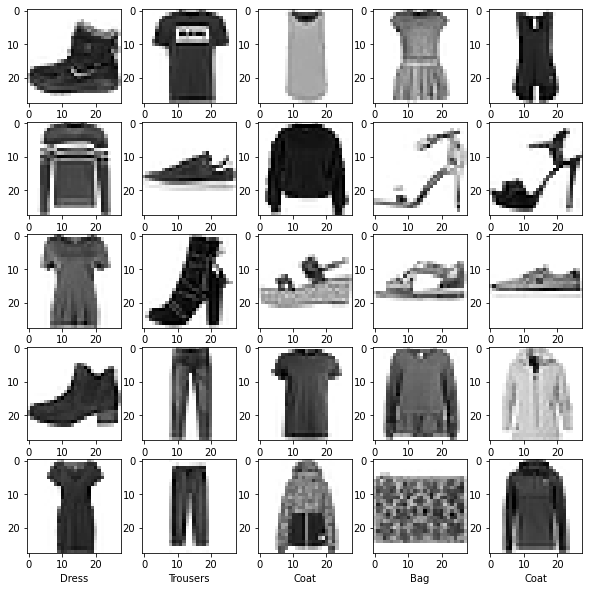

In [53]:
#   To verify that our data in the correct format, let's display the first 25 images from both sets
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks()    #   label and item position on x-axis
    plt.yticks()    #   label and item position on y-axis
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
'''
Build the Model


#   Building the layers
#   Compiling the model

'''

#   Set the layers